In [6]:
!git clone https://github.com/Leejunho123/5G_project.git
%cd 5G_project/DeepLearning

Cloning into '5G_project'...
remote: Enumerating objects: 235, done.
remote: Counting objects: 100% (235/235), done.
remote: Compressing objects: 100% (151/151), done.
remote: Total 11263 (delta 173), reused 137 (delta 83), pack-reused 11028
Receiving objects: 100% (11263/11263), 245.92 MiB | 31.87 MiB/s, done.
Resolving deltas: 100% (2711/2711), done.
Checking out files: 100% (245/245), done.
/content/5G_project/DeepLearning


## 42 선형 회귀

### 42.1 토이 데이터셋
+ 실험용 작은 데이터셋, 시드값을 고정

In [1]:
import numpy as np

np.random.seed(0)
x = np.random.rand(100,1)
y = 5 + 2 * x + np.random.rand(100,1)

In [3]:
import matplotlib.pyplot as plt



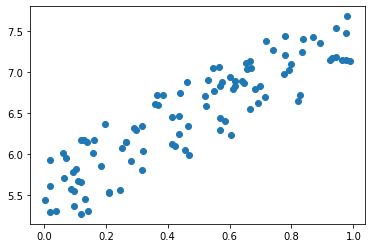

In [5]:
plt.scatter(x,y)

### 42.2 선형 회귀 이론
$y = Wx + b$
+ mse 

### 42.3 선형 회귀 구현

In [40]:
import numpy as np
from dezero import Variable
import dezero.functions as F

np.random.seed(0)
x = np.random.rand(100,1)
y = 5 + 2 * x + np.random.rand(100, 1)

x1, y1 = Variable(x), Variable(y)

W = Variable(np.zeros((1,1)))
b = Variable(np.zeros(1))

def predict(x):
  y = F.matmul(x,W) + b
  return y

In [41]:
def mean_squared_error(x0, x1):
  diff = x0 - x1
  return F.sum(diff ** 2) / len(diff)

lr = 0.1
iters = 100


for i in range(iters):
  y_pred = predict(x1)
  loss = mean_squared_error(y1, y_pred)
  W.cleargrad()
  b.cleargrad()
  loss.backward()

  W.data -= lr * W.grad.data
  b.data -= lr * b.grad.data
  
  print(W,b,loss)
pred = y_pred.data

variable([[0.64433458]]) variable([1.29473389]) variable(42.296340129442335)
variable([[1.12672345]]) variable([2.26959351]) variable(23.97380754378544)
variable([[1.48734571]]) variable([3.00386712]) variable(13.609686745040522)
variable([[1.75641886]]) variable([3.557186]) variable(7.747049961219976)
variable([[1.95666851]]) variable([3.97439789]) variable(4.43057410592155)
variable([[2.10518573]]) variable([4.28923203]) variable(2.554280381353593)
variable([[2.21482401]]) variable([4.52705574]) variable(1.492599869047195)
variable([[2.29524981]]) variable([4.70694745]) variable(0.8916952181756939)
variable([[2.35373273]]) variable([4.84325585]) variable(0.5514270962227455)
variable([[2.39573972]]) variable([4.9467725]) variable(0.3585915308319281)
variable([[2.425382]]) variable([5.02561369]) variable(0.24915731977561134)
variable([[2.44575118]]) variable([5.08588371]) variable(0.1869065876539789)
variable([[2.45917205]]) variable([5.13217364]) variable(0.1513533629631488)
variable(

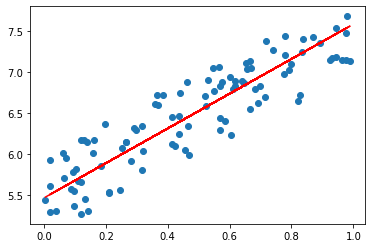

In [46]:
plt.scatter(x,y)
plt.plot(x,pred, color='red')

### 42.4 Dezero의 mean_squared_error 함수
+ 지금 사용한 mse 함수는 3개의 참조 변수를 사용하는 데 메모리가 충분하다면 상관없지만 더 좋은 방식은 모두 변수로 지정해주는 것이다.

In [ ]:
def MeanSquaredError(Function):
  def forward(self, x0, x1):
    diff = x0 - x1
    y = (diff ** 2).sum() / len(diff)
  
  def backward(self, gy):
    x0, x1 = self.inputs
    diff = x0 - x1
    gx0 = gy * diff * (2. / len(diff))
    gx1 = -gx0
    return gx0, gx1

def mean_squared_error(x0, x1):
  return MeanSquaredError()(x0,x1)

In [ ]:
def mean_squared_error_simple(x0, x1):
  diff = x0 - x1
  return F.sum(diff ** 2) / len(diff)